<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/06wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

{{<video https://youtu.be/playlist?list=PLQqh36zP38-wTzMRmZzvr2TL12DNo6jXF&si=RnG6_-uhn9Yb57nU >}}

# 2. Imports

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fastai.vision.all 

# 3. torch.eigensum

## A. transpose

In [77]:
tsr = torch.tensor([1,2,3,4]).reshape(2,2)
tsr

tensor([[1, 2],
        [3, 4]])

In [78]:
tsr.t()

tensor([[1, 3],
        [2, 4]])

In [79]:
torch.einsum('ij->ji',tsr)

tensor([[1, 3],
        [2, 4]])

## B. 행렬곱

In [82]:
tsr1 = torch.arange(12).reshape(4,3).float()
tsr2 = torch.arange(15).reshape(3,5).float()

In [14]:
tsr1.shape

torch.Size([4, 3])

In [15]:
tsr2.shape

torch.Size([3, 5])

In [83]:
tsr1 @ tsr2

tensor([[ 25.,  28.,  31.,  34.,  37.],
        [ 70.,  82.,  94., 106., 118.],
        [115., 136., 157., 178., 199.],
        [160., 190., 220., 250., 280.]])

In [84]:
tsr1.matmul(tsr2)

tensor([[ 25.,  28.,  31.,  34.,  37.],
        [ 70.,  82.,  94., 106., 118.],
        [115., 136., 157., 178., 199.],
        [160., 190., 220., 250., 280.]])

In [85]:
torch.einsum('ij,jk -> ik',tsr1,tsr2) 

tensor([[ 25.,  28.,  31.,  34.,  37.],
        [ 70.,  82.,  94., 106., 118.],
        [115., 136., 157., 178., 199.],
        [160., 190., 220., 250., 280.]])

In [88]:
A = torch.arange(0,4)
B = torch.arange(2,6)
print(A)
print(B)

C = torch.einsum('i,i->',A,B)
print(C)

tensor([0, 1, 2, 3])
tensor([2, 3, 4, 5])
tensor(26)


In [98]:
A = torch.arange(0,4).reshape(4,1)
B = torch.arange(2,6).reshape(4,1)
print(A)
print(B)

C = torch.einsum('ij,ij->ij',A,B)
print(C)

tensor([[0],
        [1],
        [2],
        [3]])
tensor([[2],
        [3],
        [4],
        [5]])
tensor([[ 0],
        [ 3],
        [ 8],
        [15]])


In [100]:
A = torch.arange(0,4)
_A=A.reshape(2,2)
torch.einsum('i->',A),torch.einsum('ij->',_A)

(tensor(6), tensor(6))

In [37]:
A.sum()

tensor(6)

## C. 이미지변환

In [102]:
r = torch.zeros(16).reshape(4,4) + 1.0
g = torch.zeros(16).reshape(4,4) + 0.5
b = torch.zeros(16).reshape(4,4) + 0.5

In [103]:
torch.stack([r,g,b],axis=-1).shape

torch.Size([4, 4, 3])

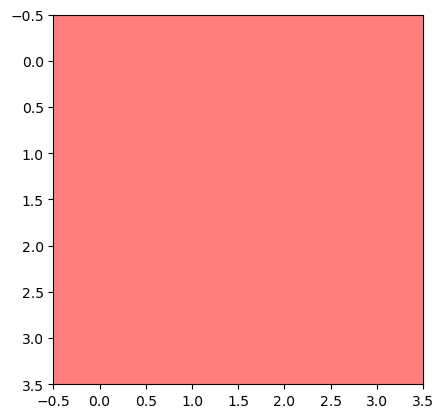

In [104]:
# plt 에서 보려면 channel이 맨 마지막에 와야한다.
plt.imshow(torch.stack([r,g,b],axis=-1)) 

In [105]:
torch.stack([r,g,b],axis=0).shape

torch.Size([3, 4, 4])

In [107]:
r = torch.zeros(16).reshape(4,4) + 1.0
g = torch.zeros(16).reshape(4,4)
b = torch.zeros(16).reshape(4,4)
img_plt = torch.stack([r,g,b],axis=-1) # matplotlib 를 쓰기 위해서는 이미지가 이렇게 저장되어있어야한다.  
img_torch = torch.stack([r,g,b],axis=0).reshape(1,3,4,4) # torch를 쓰기 위해서는 이미지가 이렇게 저장되어있어야한다.  1: obs 2: ch 3: width 4: height

In [33]:
# 두 데이터의 차원이 다르다.
img_plt.shape, img_torch.shape

(torch.Size([4, 4, 3]), torch.Size([1, 3, 4, 4]))

TypeError: Invalid shape (1, 3, 4, 4) for image data

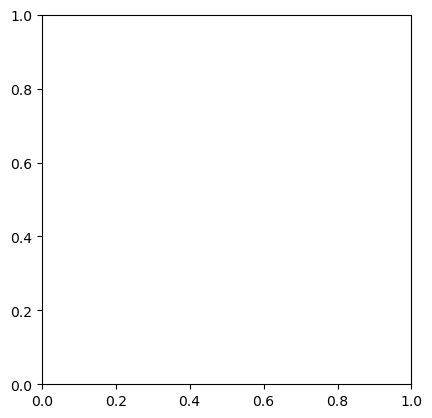

In [71]:
# TypeError: Invalid shape (1, 3, 4, 4) for image data
plt.imshow(img_torch)

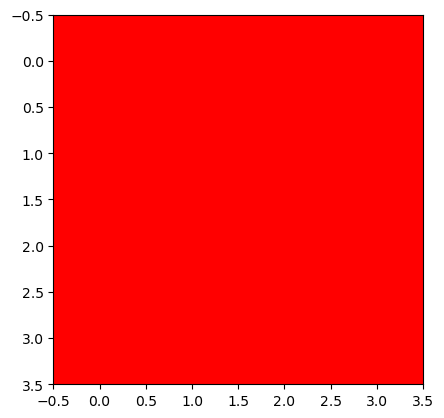

In [34]:
plt.imshow(img_plt)

만약에 `img_torch`를 matplotlib 으로 보고싶다면? 

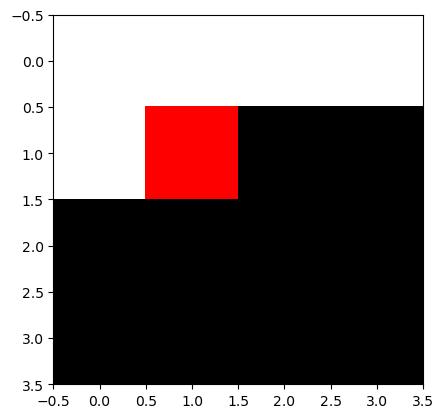

In [108]:
# 잘못된코드
plt.imshow(img_torch.reshape(4,4,3))

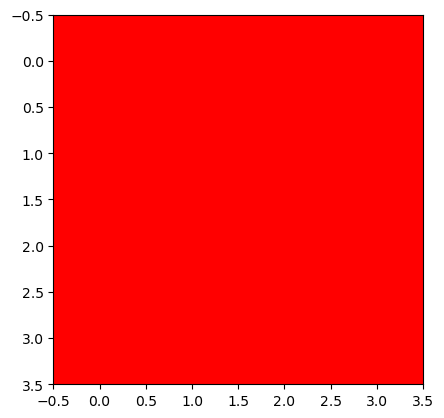

In [109]:
# 올바른코드
plt.imshow(torch.einsum('ocij -> ijc',img_torch))   # shape (1, 3, 4, 4) -> (4, 4, 3) 으로 einsum을 이용하여 reshape


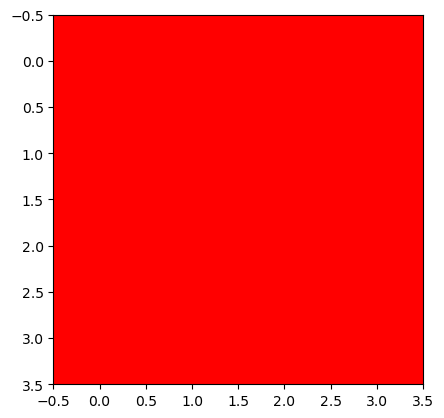

In [110]:
# 올바른코드
plt.imshow(torch.einsum('ocwh->whc',img_torch)) # shape (1, 3, 4, 4) -> (4, 4, 3) 으로 einsum을 이용하여 reshape


# 4. MNIST -- 직접설계

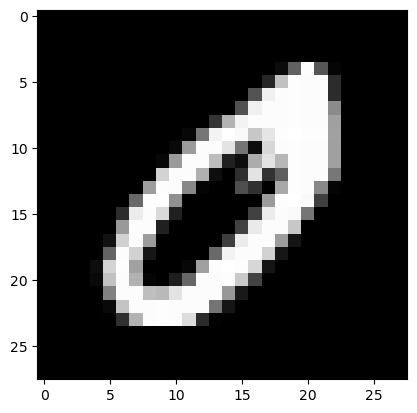

In [127]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
plt.imshow(torchvision.io.read_image(path/'training/0/41447.png').reshape(28,28,1),cmap="gray")

In [158]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/2').ls()])
X = torch.concat([X0,X1,X2])/255        # X를 0~1 사이의 float로 변환
y = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()  # y는 float
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/2').ls()])
XX = torch.concat([X0,X1,X2])/255
yy = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()

In [225]:
print(X.shape,'\t',X.dtype)     # X 가 int 이면 torch에서 학습이 불가능하다. 강의 11분30초에서 언급
print(y.shape,'\t',y.dtype)     # onehot encoding 할거기에 y는 float타입
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t',yy.dtype)

torch.Size([18623, 1, 28, 28]) 	 torch.float32
torch.Size([18623, 3]) 	 torch.float32
torch.Size([3147, 1, 28, 28]) 	 torch.float32
torch.Size([3147, 3]) 	 torch.float32


In [126]:
# # 꼭 X 를 255로 나눠줄 필요는 없긴하다. X가 float 타입이고 y또한 onehot방식이니 float 타입이기만 하면 된다.
# path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
# X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
# X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
# X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/2').ls()])
# X = torch.concat([X0,X1,X2]).float()        # X를 0~1 사이의 float로 변환
# y = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()  # y는 float
# X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
# X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
# X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/2').ls()])
# XX = torch.concat([X0,X1,X2]).float()
# yy = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()

In [116]:
X0.shape , X.shape , X.dtype , y.dtype

(torch.Size([980, 1, 28, 28]),
 torch.Size([18623, 1, 28, 28]),
 torch.int32,
 torch.int32)

In [129]:
torchvision.io.read_image((path/'training/0').ls()[0])

tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,  11,  97, 253,  86,   5,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,  38, 193, 253, 252, 252,  45,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

In [93]:
torchvision.io.read_image((path/'training/0').ls()[0]).shape

torch.Size([1, 28, 28])

In [108]:
X[0]

tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,  11,  97, 253,  86,   5,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,  38, 193, 253, 252, 252,  45,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

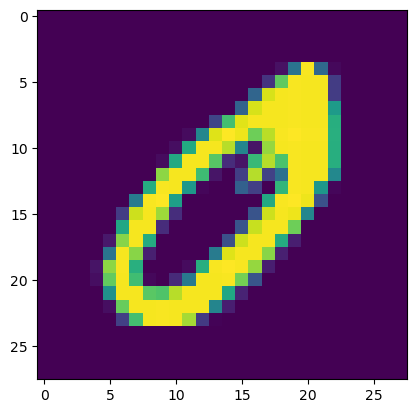

In [110]:
plt.imshow(torch.einsum('cwh->whc',X[0]))

In [160]:
torchvision.io.read_image((path/'training/0').ls()[0]).shape

torch.Size([1, 28, 28])

TypeError: Invalid shape (1, 28, 28) for image data

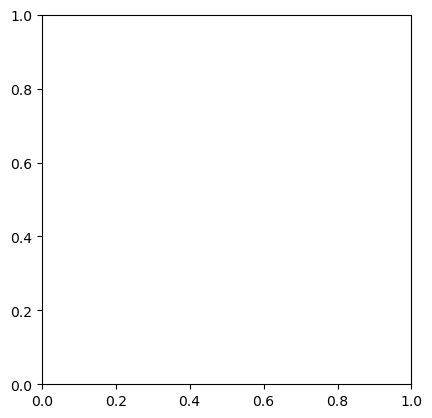

In [166]:
plt.imshow(torchvision.io.read_image((path/'training/0').ls()[0]))

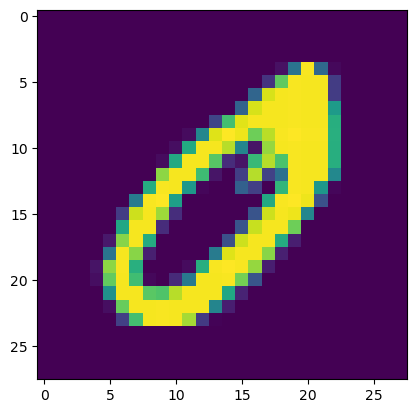

In [165]:
plt.imshow(torchvision.io.read_image((path/'training/0').ls()[0]).reshape(28,28,1))

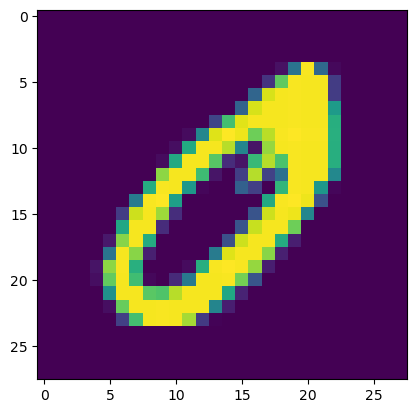

In [164]:
# plt.imshow(torchvision.io.read_image((path/'training/0').ls()[0]).reshape(28,28,1))
plt.imshow(torch.einsum('cwh->whc',torchvision.io.read_image((path/'training/0').ls()[0])))

In [85]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST) 
[torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()]

[tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,  11,  97, 253,  86,   5,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,  38, 193, 253, 252, 252,  45,   0,   0,   0,   0,   0],
          [  0,   0,  

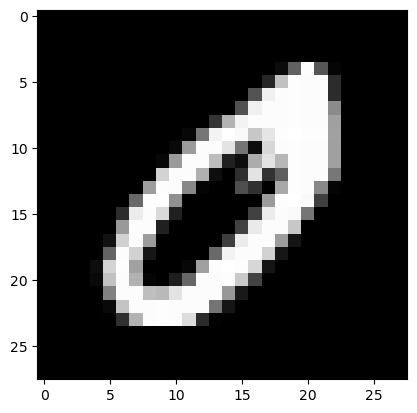

In [79]:
plt.imshow(torch.einsum('cij -> ijc',X[0]),cmap="gray")

## A. y: (n,3)-float 

In [213]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/2').ls()])
X = torch.concat([X0,X1,X2])/255        # X를 0~1 사이의 float로 변환
y = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()  # y는 float
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/2').ls()])
XX = torch.concat([X0,X1,X2])/255
yy = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()

In [197]:
torch.manual_seed(5) 
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,3),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
print(f'train: {(net(X).data.argmax(axis=1) == y.argmax(axis=1)).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=1) == yy.argmax(axis=1)).float().mean():.4f}')

train: 0.9863
val: 0.9924


In [181]:
yhat

tensor([[-0.2077,  0.3708,  0.1251],
        [-0.0184,  0.1445,  0.1923],
        [-0.0487,  0.0071,  0.0379],
        [-0.1264,  0.1279,  0.0756],
        [-0.1437,  0.1651,  0.1393],
        [ 0.0151,  0.0566,  0.1402],
        [-0.0389,  0.0890,  0.0496],
        [-0.2003,  0.1166,  0.1229],
        [-0.1935,  0.1276,  0.0698],
        [-0.1831,  0.1288,  0.0606],
        [-0.1477,  0.1102, -0.0031],
        [-0.1482,  0.1436,  0.1730],
        [-0.2596,  0.2324,  0.0791],
        [-0.2070,  0.2004,  0.0967],
        [-0.0517,  0.1506,  0.1314],
        [-0.1118,  0.2300,  0.1508],
        [-0.1013,  0.1525,  0.0897],
        [-0.0553,  0.0272,  0.0918],
        [-0.1893,  0.1696,  0.1496],
        [-0.1248,  0.0376,  0.1504],
        [-0.1863,  0.1643,  0.0381],
        [-0.0262,  0.0935,  0.1094],
        [-0.1615,  0.1497,  0.0847],
        [-0.1012,  0.0857,  0.1295],
        [-0.1173,  0.0808,  0.1046],
        [-0.0414,  0.0344,  0.0603],
        [-0.1142,  0.2002,  0.1121],
 

In [174]:
net1(X).shape

torch.Size([18623, 2304])

In [220]:
torch.manual_seed(5) 

ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)

dl1 = torch.utils.data.DataLoader(ds1,batch_size=128)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=128)

net=torch.nn.Sequential(
    torch.nn.Conv2d(1,16,kernel_size=(2,2)),    # torch.Size([18623, 16, 27, 27])
    torch.nn.ReLU(),                            # torch.Size([18623, 16, 27, 27])
    torch.nn.MaxPool2d(kernel_size=(2,2)),      # torch.Size([18623, 16, 13, 13])
    torch.nn.Flatten(),                         # torch.Size([18623, 2704])
    torch.nn.Linear(2704,3),                    # torch.Size([18623, 3])
    # softmax
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(10):
    for xi,yi in dl1:
        yhat=net(xi.to("cuda:0"))
        loss=loss_fn(yhat,yi.to("cuda:0"))
        loss.backward()
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
print(f'train: {(net(X).data.argmax(axis=-1) == y.argmax(axis=-1)).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=-1) == yy.argmax(axis=-1)).float().mean():.4f}')

train: 0.9415
val: 0.9466


In [186]:
for xi,yi in dl:
    print(f'x_batch={len(xi.tolist())} \t y_batch={len(yi.tolist())}')
    
# for xi,yi in dl:
#     print(f'x_batch={xi.tolist()} \t y_batch={yi.tolist()}')

x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 	 y_batch=128
x_batch=128 

In [175]:
X[0].shape , X[[0]].shape

(torch.Size([1, 28, 28]), torch.Size([1, 1, 28, 28]))

In [176]:
X[0].unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [181]:
net(X[[0]])

tensor([[ 0.0866,  0.1188, -0.0795]], grad_fn=<AddmmBackward0>)

In [178]:
net(X[0].unsqueeze(0))

tensor([[0.1697, 0.0856, 0.1154]], grad_fn=<AddmmBackward0>)

## B. y: (n,)-int

In [203]:
y.shape , y , y.dtype

(torch.Size([18623, 3]),
 tensor([[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.]]),
 torch.float32)

In [214]:
# y를 int로 형변환.
y = y.argmax(axis=-1)
yy = yy.argmax(axis=-1)
y.dtype

torch.int64

In [215]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)   # 원핫 인코딩이 아니라 y가 int 타입
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

torch.Size([18623, 1, 28, 28]) 	 torch.float32
torch.Size([18623]) 		 torch.int64
torch.Size([3147, 1, 28, 28]) 	 torch.float32
torch.Size([3147]) 		 torch.int64


In [227]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)   # 원핫 인코딩이 아니라 y가 int 타입
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

torch.Size([18623, 1, 28, 28]) 	 torch.float32
torch.Size([18623]) 		 torch.int64
torch.Size([3147, 1, 28, 28]) 	 torch.float32
torch.Size([3147]) 		 torch.int64


In [217]:
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,3),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
# print(f'train: {(net(X).data.argmax(axis=-1) == y.argmax(axis=-1)).float().mean():.4f}')
print(f'train: {(net(X).data.argmax(axis=1) == y).float().mean():.4f}') # <-- 여기수정

# print(f'val: {(net(XX).data.argmax(axis=-1) == yy.argmax(axis=-1)).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=1) == yy).float().mean():.4f}') # <-- 여기수정

train: 0.9862
val: 0.9917


# 5. Fashion-MNIST -- fastai

`-` Data

In [2]:
df_train=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_train.csv')
df_test=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_test.csv')
def rshp(row):
    return row.reshape(1,28,28)
X = torch.tensor(np.apply_along_axis(rshp,axis=1,arr=np.array(df_train.iloc[:,1:]))).float()
XX  = torch.tensor(np.apply_along_axis(rshp,axis=1,arr=np.array(df_test.iloc[:,1:]))).float()
y = torch.tensor(np.array(df_train.label))
yy  = torch.tensor(np.array(df_test.label))

In [231]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t\t',y.dtype)     # dtype 이 int 형 (one hot encoding형태가 아님)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t\t',yy.dtype)   # dtype 이 int 형 (one hot encoding형태가 아님)

torch.Size([60000, 1, 28, 28]) 	 torch.float32
torch.Size([60000]) 			 torch.int64
torch.Size([10000, 1, 28, 28]) 	 torch.float32
torch.Size([10000]) 			 torch.int64


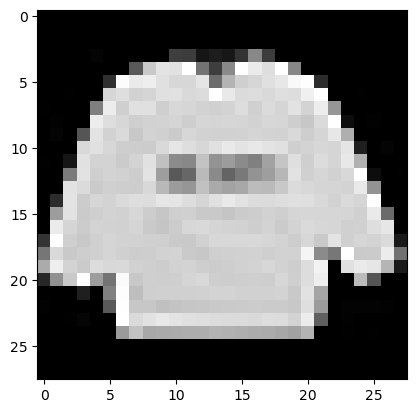

In [232]:
plt.imshow(torch.einsum('cij -> ijc',X[0]),cmap="gray")

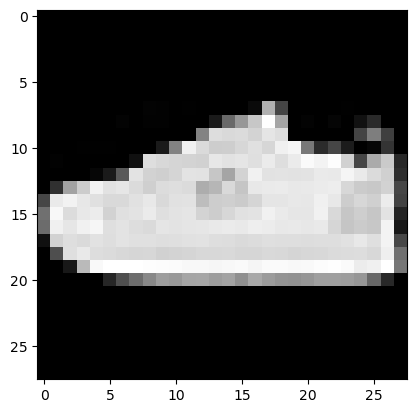

In [233]:
plt.imshow(torch.einsum('cij -> ijc',X[-1]),cmap="gray")

y의 class는 총 10개. 따라서 softmax도 최종 출력층은 10개가 되어야 한다.

In [236]:
set(y.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## A. torch

In [3]:
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,10),   # 10으로 최종 클래스 바꿈
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
print(f'train: {(net(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.9011
val: 0.8615


## B. fastai

In [9]:
X.shape[0] / 128

60000

In [218]:
fastai.learner.Learner?

Init signature:
fastai.learner.Learner(
    dls: 'DataLoaders',
    model: 'callable',
    loss_func: 'callable | None' = None,
    opt_func: 'Optimizer | OptimWrapper' = <function Adam at 0x797dd0bdfe50>,
    lr: 'float | slice' = 0.001,
    splitter: 'callable' = <function trainable_params at 0x797dd2e0e310>,
    cbs: 'Callback | MutableSequence | None' = None,
    metrics: 'callable | MutableSequence | None' = None,
    path: 'str | Path | None' = None,
    model_dir: 'str | Path' = 'models',
    wd: 'float | int | None' = None,
    wd_bn_bias: 'bool' = False,
    train_bn: 'bool' = True,
    moms: 'tuple' = (0.95, 0.85, 0.95),
    default_cbs: 'bool' = True,
)
Docstring:      Group together a `model`, some `dls` and a `loss_func` to handle training
File:           ~/.conda/envs/dl2024/lib/python3.8/site-packages/fastai/learner.py
Type:           type
Subclasses:     

In [221]:
y.dtype

torch.int64

In [240]:
# Step1: 데이터정리 (dls생성)
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=128) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)   # validation인데도 batch_size가 있는 이유? : 효율적인 gpu 메모리를 사용하기 위해. (학습속도를 빠르게 하려는건 아니다.)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
#optimizr = torch.optim.Adam(net.parameters())
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    # torch.Size([60000, 1, 28, 28])
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3: 적합 
lrnr.fit(10)
# Step4: 예측 및 평가 

lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.9772
val: 0.9806


In [241]:
list(lrnr.model.parameters())

[Parameter containing:
 tensor([[[[ 0.1286, -0.0908, -0.1184, -0.0606,  0.0581],
           [ 0.0987, -0.0961, -0.0265, -0.1960, -0.0616],
           [-0.0113, -0.2786,  0.0322,  0.0699,  0.1671],
           [ 0.0634, -0.0650, -0.1164, -0.1682,  0.0778],
           [-0.0074, -0.2918, -0.0774,  0.0342,  0.0605]]],
 
 
         [[[-0.0038, -0.0623,  0.2218,  0.0576,  0.3409],
           [-0.2378, -0.1584,  0.1211,  0.1617,  0.0298],
           [-0.3385,  0.0261, -0.1345, -0.0010,  0.1041],
           [-0.1536, -0.0791, -0.1658, -0.0166,  0.0186],
           [ 0.0357, -0.2605, -0.1892, -0.1600, -0.3377]]],
 
 
         [[[-0.0131,  0.1207, -0.1225, -0.2816, -0.0971],
           [ 0.1742,  0.2079, -0.1405, -0.3115, -0.0419],
           [ 0.1949, -0.0899, -0.1416, -0.0450, -0.0802],
           [ 0.1036,  0.1757, -0.2232, -0.2530, -0.2415],
           [ 0.1562,  0.1742, -0.2081, -0.1797,  0.0572]]],
 
 
         [[[-0.4671, -0.3175, -0.2433, -0.0626,  0.1079],
           [-0.3580, -0.2007,  

# 6. ImageNet -- 직접설계/transfer 

## A. 알렉스넷[@krizhevsky2012imagenet]의 의미

`-` 야사로 배우는 인공지능: <https://brunch.co.kr/@hvnpoet/109>

## B. 알렉스넷의 아키텍처 써보기 

`-` 알렉스넷의 아키텍처: 

-ref: <https://en.wikipedia.org/wiki/AlexNet#:~:text=AlexNet%20is%20the%20name%20of,at%20the%20University%20of%20Toronto.>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/960px-Comparison_image_neural_networks.svg.png)

`-` 재미삼아 써보면.. 

In [253]:
img = torch.zeros(1,3*227*227).reshape(1,3,227,227)
img.shape , img.dtype

(torch.Size([1, 3, 227, 227]), torch.float32)

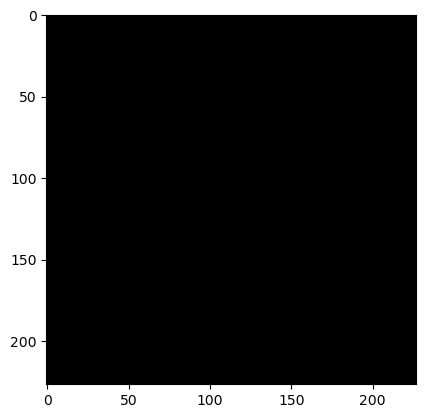

In [254]:
plt.imshow(torch.einsum('ocij ->ijc',img),cmap="gray")

In [289]:

img = torch.zeros(1,3*227*227).reshape(1,3,227,227)

net = torch.nn.Sequential(
    torch.nn.Conv2d(3,96,kernel_size=(11,11),stride=4),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(3,3),stride=2), # default stride는 3
    torch.nn.Conv2d(96,256,kernel_size=(5,5),padding=2), # image의 width 와 height 를 그대로 27x27로 유지하기 위해 padding
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(3,3),stride=2),
    torch.nn.Conv2d(256,384,kernel_size=(3,3),padding=1,),
    torch.nn.ReLU(),
    torch.nn.Conv2d(384,384,kernel_size=(3,3),padding=1),
    torch.nn.ReLU(),
    torch.nn.Conv2d(384,256,kernel_size=(3,3),padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(3,3),stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(9216,4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096,4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096,1000),
)
#net(img).shape , plt.imshow(torch.einsum('ocij ->ijc',img),cmap="gray")

`-` 참고사항: `torchvision.models.alexnet()`을 이용하여 네크워크를 선언할 수도 있음. 

In [51]:
torchvision.models.alexnet()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

::: {.callout-note}
직접구현한 알렉스넷과 `torchvision.models.alexnet()`를 이용한 알렉스넷은 약간다름. 

그 이유는 파이토치에서는 원래 논문에서 구현된 알렉스넷이 아니라 이후 수정된 알렉스넷을 사용하기 때문임. 이 내용은 파이토치 공식홈페이지에서 아래와 같이 명시되어있음. 

```
AlexNet was originally introduced in the ImageNet Classification with Deep Convolutional Neural Networks paper. Our implementation is based instead on the “One weird trick” paper above.
```

ref: <https://pytorch.org/vision/main/models/generated/torchvision.models.alexnet.html>
:::

## C. 알렉스넷으로 ImageNet 적합

In [52]:
pass # 데이터가 너무 커서.. 코랩에서 못할것같아요

# 7. CIFAR10 -- transfer

## A. `dls` 만들자

`-` X,y를 얻자. 

In [2]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.CIFAR)
path.ls()

(#3) [Path('/home/myuser/.fastai/data/cifar10/labels.txt'),Path('/home/myuser/.fastai/data/cifar10/test'),Path('/home/myuser/.fastai/data/cifar10/train')]

In [3]:
!cat /home/myuser/.fastai/data/cifar10/labels.txt

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [4]:
from pathlib import Path


In [5]:
list(Path('/home/myuser/.fastai/data/cifar10/train').ls())

[Path('/home/myuser/.fastai/data/cifar10/train/frog'),
 Path('/home/myuser/.fastai/data/cifar10/train/dog'),
 Path('/home/myuser/.fastai/data/cifar10/train/horse'),
 Path('/home/myuser/.fastai/data/cifar10/train/cat'),
 Path('/home/myuser/.fastai/data/cifar10/train/airplane'),
 Path('/home/myuser/.fastai/data/cifar10/train/automobile'),
 Path('/home/myuser/.fastai/data/cifar10/train/ship'),
 Path('/home/myuser/.fastai/data/cifar10/train/deer'),
 Path('/home/myuser/.fastai/data/cifar10/train/bird'),
 Path('/home/myuser/.fastai/data/cifar10/train/truck')]

In [391]:
type([fname for fname in Path('/home/myuser/.fastai/data/cifar10/train').ls()]) , type(list(Path('/home/myuser/.fastai/data/cifar10/train').ls()))

(list, list)

In [38]:
[fname for fname in Path('/home/myuser/.fastai/data/cifar10/train').ls()] == list(Path('/home/myuser/.fastai/data/cifar10/train').ls())

True

In [277]:
torchvision.io.read_image(Path('/home/myuser/.fastai/data/cifar10/train/cat/10255_cat.png'))/255 # float로 형변환

tensor([[[0.1882, 0.1922, 0.1647,  ..., 0.2471, 0.2000, 0.2314],
         [0.1804, 0.1922, 0.1647,  ..., 0.3020, 0.2431, 0.2784],
         [0.1765, 0.1882, 0.1686,  ..., 0.3294, 0.2863, 0.3176],
         ...,
         [0.3922, 0.4667, 0.5569,  ..., 0.6392, 0.6824, 0.7020],
         [0.5882, 0.5569, 0.6431,  ..., 0.6196, 0.6549, 0.6902],
         [0.6706, 0.6353, 0.6353,  ..., 0.6196, 0.6392, 0.6745]],

        [[0.2745, 0.2706, 0.2392,  ..., 0.3294, 0.2824, 0.3176],
         [0.2667, 0.2667, 0.2392,  ..., 0.3804, 0.3255, 0.3569],
         [0.2627, 0.2667, 0.2431,  ..., 0.4118, 0.3686, 0.4000],
         ...,
         [0.4824, 0.5765, 0.6235,  ..., 0.8431, 0.8471, 0.8588],
         [0.6000, 0.5804, 0.6118,  ..., 0.8392, 0.8471, 0.8549],
         [0.6667, 0.6353, 0.5922,  ..., 0.7843, 0.8196, 0.8431]],

        [[0.3333, 0.3255, 0.2824,  ..., 0.3961, 0.3490, 0.3843],
         [0.3255, 0.3216, 0.2824,  ..., 0.4471, 0.3922, 0.4235],
         [0.3216, 0.3216, 0.2863,  ..., 0.4784, 0.4353, 0.

torch.Size([32, 32, 3])

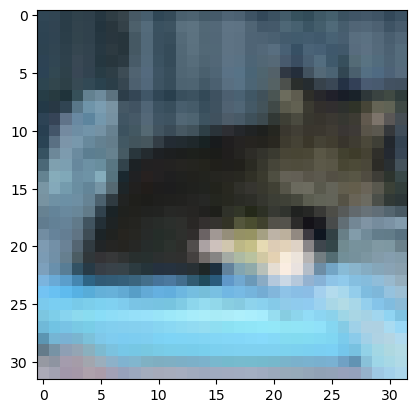

In [288]:
plt.imshow(torch.einsum('cij->ijc',torchvision.io.read_image(Path('/home/myuser/.fastai/data/cifar10/train/cat/10255_cat.png'))))
_cat1=torch.einsum('cij->ijc',torchvision.io.read_image(Path('/home/myuser/.fastai/data/cifar10/train/cat/10255_cat.png')))
_cat1.shape

In [293]:
torch.stack([_cat1]).shape

torch.Size([1, 32, 32, 3])

In [27]:
torch.stack([torchvision.io.read_image(str(fname)) for fname in (Path('/home/myuser/.fastai/data/cifar10/train/cat').ls())])
# X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])


torch.Size([5000, 3, 32, 32])

In [47]:
#torch.stack(torchvision.io.read_image(str(list(Path('/home/myuser/.fastai/data/cifar10/train/cat').ls()))))
# 리스트의 각 파일 경로에 대해 torchvision.io.read_image를 호출하여 텐서를 반환하고, 이를 torch.stack으로 쌓음
torch.stack(list(map(lambda fname: torchvision.io.read_image(str(fname)), Path('/home/myuser/.fastai/data/cifar10/train/cat').ls())))

tensor([[[[107,  98,  91,  ..., 109, 111, 113],
          [111, 112,  92,  ..., 105, 108, 111],
          [120, 147,  91,  ..., 103, 104, 109],
          ...,
          [130, 132, 137,  ...,  98,  95,  99],
          [131, 132, 132,  ..., 127, 132, 136],
          [140, 154, 152,  ..., 144, 138, 148]],

         [[137, 139, 145,  ..., 150, 151, 153],
          [133, 126, 125,  ..., 147, 150, 154],
          [142, 135,  78,  ..., 147, 148, 154],
          ...,
          [117, 114, 116,  ...,  81,  79,  86],
          [115, 116, 115,  ..., 109, 112, 115],
          [116, 134, 134,  ..., 125, 116, 124]],

         [[143, 143, 146,  ..., 158, 159, 162],
          [135, 124, 119,  ..., 154, 157, 161],
          [144, 126,  72,  ..., 154, 155, 161],
          ...,
          [ 92,  83,  89,  ...,  67,  65,  72],
          [ 90,  87,  87,  ...,  85,  86,  91],
          [ 90, 103, 103,  ...,  97,  90, 101]]],


        [[[186, 168, 147,  ..., 103, 102, 112],
          [185, 182, 155,  ...,  95

In [40]:
[fname for fname in Path('/home/myuser/.fastai/data/cifar10/train').ls()] == list(Path('/home/myuser/.fastai/data/cifar10/train').ls())

True

In [295]:
labels = [str(l).split('/')[-1] for l in (path/'train').ls()]
labels

['frog',
 'dog',
 'horse',
 'cat',
 'airplane',
 'automobile',
 'ship',
 'deer',
 'bird',
 'truck']

labels = [str(l).split('/')[-1] for l in (path/'train').ls()] 에 대한 설명

In [ ]:
Path('/home/myuser/.fastai/data/cifar10/train')

Path('/home/myuser/.fastai/data/cifar10/train')

In [ ]:
Path('/home/myuser/.fastai/data/cifar10/train').ls()    # list와 비슷함 따라서 comprehension도 가능

(#10) [Path('/home/myuser/.fastai/data/cifar10/train/frog'),Path('/home/myuser/.fastai/data/cifar10/train/dog'),Path('/home/myuser/.fastai/data/cifar10/train/horse'),Path('/home/myuser/.fastai/data/cifar10/train/cat'),Path('/home/myuser/.fastai/data/cifar10/train/airplane'),Path('/home/myuser/.fastai/data/cifar10/train/automobile'),Path('/home/myuser/.fastai/data/cifar10/train/ship'),Path('/home/myuser/.fastai/data/cifar10/train/deer'),Path('/home/myuser/.fastai/data/cifar10/train/bird'),Path('/home/myuser/.fastai/data/cifar10/train/truck')]

In [ ]:
[Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

[(#10) [Path('/home/myuser/.fastai/data/cifar10/train/frog'),Path('/home/myuser/.fastai/data/cifar10/train/dog'),Path('/home/myuser/.fastai/data/cifar10/train/horse'),Path('/home/myuser/.fastai/data/cifar10/train/cat'),Path('/home/myuser/.fastai/data/cifar10/train/airplane'),Path('/home/myuser/.fastai/data/cifar10/train/automobile'),Path('/home/myuser/.fastai/data/cifar10/train/ship'),Path('/home/myuser/.fastai/data/cifar10/train/deer'),Path('/home/myuser/.fastai/data/cifar10/train/bird'),Path('/home/myuser/.fastai/data/cifar10/train/truck')]]

In [ ]:
[label for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

[Path('/home/myuser/.fastai/data/cifar10/train/frog'),
 Path('/home/myuser/.fastai/data/cifar10/train/dog'),
 Path('/home/myuser/.fastai/data/cifar10/train/horse'),
 Path('/home/myuser/.fastai/data/cifar10/train/cat'),
 Path('/home/myuser/.fastai/data/cifar10/train/airplane'),
 Path('/home/myuser/.fastai/data/cifar10/train/automobile'),
 Path('/home/myuser/.fastai/data/cifar10/train/ship'),
 Path('/home/myuser/.fastai/data/cifar10/train/deer'),
 Path('/home/myuser/.fastai/data/cifar10/train/bird'),
 Path('/home/myuser/.fastai/data/cifar10/train/truck')]

In [6]:
[str(label) for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

['/home/myuser/.fastai/data/cifar10/train/frog',
 '/home/myuser/.fastai/data/cifar10/train/dog',
 '/home/myuser/.fastai/data/cifar10/train/horse',
 '/home/myuser/.fastai/data/cifar10/train/cat',
 '/home/myuser/.fastai/data/cifar10/train/airplane',
 '/home/myuser/.fastai/data/cifar10/train/automobile',
 '/home/myuser/.fastai/data/cifar10/train/ship',
 '/home/myuser/.fastai/data/cifar10/train/deer',
 '/home/myuser/.fastai/data/cifar10/train/bird',
 '/home/myuser/.fastai/data/cifar10/train/truck']

In [7]:
[str(label).split('/') for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

[['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'frog'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'dog'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'horse'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'cat'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'airplane'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'automobile'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'ship'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'deer'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'bird'],
 ['', 'home', 'myuser', '.fastai', 'data', 'cifar10', 'train', 'truck']]

In [9]:
labels = [str(l).split('/')[-1] for l in (path/'train').ls()]

In [11]:
[str(label).split('/')[-1] for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

['frog',
 'dog',
 'horse',
 'cat',
 'airplane',
 'automobile',
 'ship',
 'deer',
 'bird',
 'truck']

In [10]:
labels==[str(label).split('/')[-1] for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()]    

True

In [339]:
for l in labels:
    print(l)
# [l for l in (path/f'{l}').ls()]

frog
dog
horse
cat
airplane
automobile
ship
deer
bird
truck


In [25]:
l = 'cat'
fname='12815_cat.png'
path = Path('/home/myuser/.fastai/data/cifar10/train')
torchvision.io.read_image(f'/home/myuser/.fastai/data/cifar10/train/cat/12815_cat.png')
torchvision.io.read_image(f'/home/myuser/.fastai/data/cifar10/train/{l}/12815_cat.png')
torchvision.io.read_image(f'/home/myuser/.fastai/data/cifar10/train/{l}/{fname}')


tensor([[[ 80,  60,  38,  ..., 105, 112, 104],
         [ 86,  65,  41,  ..., 134, 125, 129],
         [ 89,  63,  42,  ..., 125, 130, 113],
         ...,
         [ 71,  77,  87,  ...,  91,  81,  75],
         [ 70,  77,  85,  ...,  91,  81,  77],
         [ 61,  71,  81,  ...,  89,  72,  70]],

        [[ 51,  38,  22,  ...,  91,  97,  91],
         [ 57,  44,  25,  ..., 121, 112, 117],
         [ 59,  43,  25,  ...,  99, 115,  97],
         ...,
         [ 68,  74,  82,  ...,  86,  76,  71],
         [ 68,  74,  80,  ...,  86,  76,  73],
         [ 59,  70,  79,  ...,  85,  67,  67]],

        [[ 38,  25,  11,  ...,  69,  72,  73],
         [ 42,  31,  15,  ...,  91,  84,  88],
         [ 43,  29,  16,  ...,  66,  87,  67],
         ...,
         [ 50,  56,  64,  ...,  66,  59,  53],
         [ 52,  58,  63,  ...,  66,  59,  56],
         [ 44,  55,  64,  ...,  66,  50,  50]]], dtype=torch.uint8)

In [35]:
torchvision.io.read_image(f'/home/myuser/.fastai/data/cifar10/train/{l}/{fname}')
torch.stack([torchvision.io.read_image(fname) for l in path.ls() for fname in (path/f'{l}').ls()]).shape


torch.Size([50000, 3, 32, 32])

In [32]:
X.shape

torch.Size([50000, 3, 32, 32])

In [12]:
X = torch.stack([torchvision.io.read_image(str(fname)) for l in labels for fname in (path/f'train/{l}').ls()],axis=0).float()/255
XX = torch.stack([torchvision.io.read_image(str(fname)) for l in labels for fname in (path/f'test/{l}').ls()],axis=0).float()/255
y = torch.tensor([i for i,l in enumerate(labels) for fname in (path/f'train/{l}').ls()])
yy = torch.tensor([i for i,l in enumerate(labels) for fname in (path/f'test/{l}').ls()])

In [324]:
y , y.dtype , X.shape

(tensor([0, 0, 0,  ..., 9, 9, 9]), torch.int64, torch.Size([50000, 3, 32, 32]))

In [298]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t\t',yy.dtype)

torch.Size([50000, 3, 32, 32]) 	 torch.float32
torch.Size([50000]) 			 torch.int64
torch.Size([10000, 3, 32, 32]) 	 torch.float32
torch.Size([10000]) 			 torch.int64


`-` 데이터를 시각화해보자. 

Text(0.5, 1.0, 'ship,6')

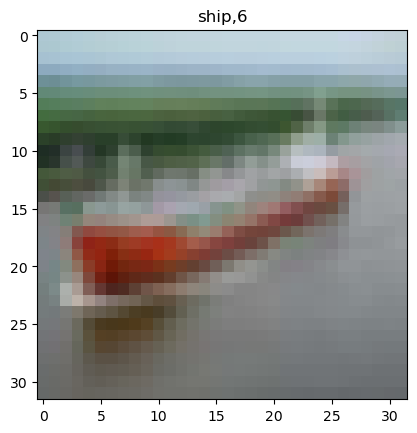

In [306]:
ylabel = [l for l in labels for fname in (path/f'train/{l}').ls()]
i = 30002
plt.imshow(torch.einsum('cij->ijc',X[i]))
plt.title(f'{ylabel[i]},{y[i]}')

- 그림이 너무 어려운데? 
- 맞추기 힘들겠는데.. 

`-` dls를 만들자. 

In [58]:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)

`-` 아래와 같이 쉽게 만들수도있음... 

In [59]:
# dls = fastai.vision.data.ImageDataLoaders.from_folder(path,train='train',valid='test')
# dls.show_batch()

## B. 수제네트워크로 학습

`-` 시도1: 이게 좀 힘들어요 ㅎㅎ

In [60]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(3136,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.1000
val: 0.1002


- ????

`-` 시도2: 셔플!

In [61]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(3136,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.6101
val: 0.5783


- 셔플의 차이가 이렇게 크다니??

`-` 시도3: 복잡하게..

In [62]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,256,(5,5)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(256,64,(5,5)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64,16,(5,5)),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(1600,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
# 코랩사용시 아래는 주석처리할것 (이유: 코랩의 RAM이 충분하지 않음) valiation set의 accuracy는 fastai결과로 확인할것. 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.7026
val: 0.6605


## C. TransferLearning으로 학습

`-` ResNet18을 다운로드 

In [301]:
net = torchvision.models.resnet18()
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

`-` 마지막의 레이어만 수정 

In [302]:
net.fc = torch.nn.Linear(512,10)

`-` 학습해보자. 

In [303]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=64,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net = torchvision.models.resnet18()
net.fc = torch.nn.Linear(512,10)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
# 코랩사용시 아래는 주석처리할것 (이유: 코랩의 RAM이 충분하지 않음) valiation set의 accuracy는 fastai결과로 확인할것. 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}') # 
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.9211
val: 0.7419


::: {.callout-caution}
통계학과서버를 이용하시는 분들은 다른 학생들을 위하여 실습이 끝난이후 커널을 죽여주시기 바랍니다. 그렇지 않으면 GPU메모리 부족으로 다른학생들이 실습하기 어렵습니다.(무슨말인지 모르겠으면 저에게 물어보세요)
:::

# 8. HW

없어요..